# Homework

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

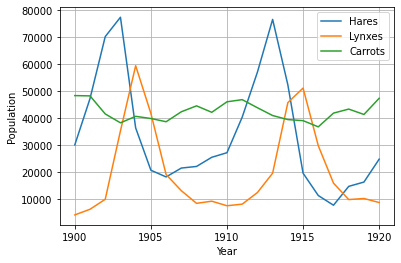

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt') 
plt.plot(data[:, 0], data[:, 1], label='Hares')
plt.plot(data[:, 0], data[:, 2], label='Lynxes')
plt.plot(data[:, 0], data[:, 3], label='Carrots')


plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.xticks([1900,1905, 1910, 1915, 1920])
plt.grid()

plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

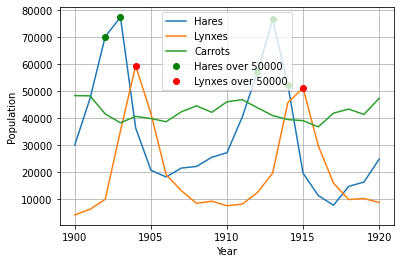

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt') 
plt.plot(data[:, 0], data[:, 1], label='Hares')
plt.plot(data[:, 0], data[:, 2], label='Lynxes')
plt.plot(data[:, 0], data[:, 3], label='Carrots')
plt.plot(data[data[:,1] > 50000, 0], data[data[:,1] > 50000, 1], 'go',label='Hares over 50000')
plt.plot(data[data[:,2] > 50000, 0], data[data[:,2] > 50000, 2], 'ro',label='Lynxes over 50000')

plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.xticks([1900,1905, 1910, 1915, 1920])
plt.grid()

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

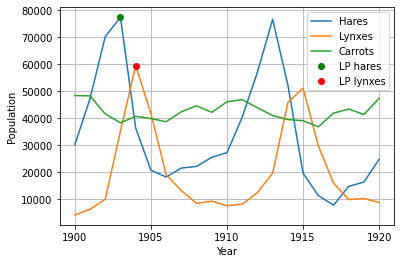

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt') 
plt.plot(data[:, 0], data[:, 1], label='Hares')
plt.plot(data[:, 0], data[:, 2], label='Lynxes')
plt.plot(data[:, 0], data[:, 3], label='Carrots')
plt.plot(data[np.argmax(data[:,1]), 0], data[np.argmax(data[:,1]), 1], 'go',label='LP hares')
plt.plot(data[np.argmax(data[:,2]), 0], data[np.argmax(data[:,2]), 2], 'ro',label='LP lynxes')


plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.xticks([1900,1905, 1910, 1915, 1920])
plt.grid()

plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

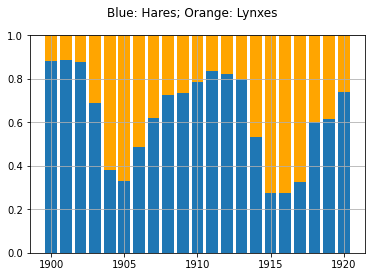

In [5]:
fig, axs = plt.subplots(1, 1)
fig.suptitle('Blue: Hares; Orange: Lynxes')
axs.bar(data[:, 0], data[:, 1]/(data[:, 1] + data[:, 2]))
axs.bar(data[:, 0], -data[:, 2]/(data[:, 1] + data[:, 2]), color='orange', bottom = 1)
axs.grid()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

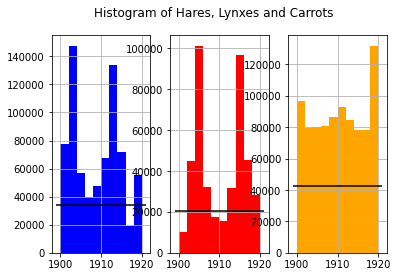

In [6]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Histogram of Hares, Lynxes and Carrots')

axs[0].hist(x=data[:, 0], weights=data[:, 1], label='Hare', color= "blue")
axs[1].hist(x=data[:, 0], weights=data[:, 2], label='Lynx', color="red")
axs[2].hist(x=data[:, 0], weights=data[:, 3], label='Carrots', color="orange")

axs[0].hlines(np.mean(data[:,1]), 1899, 1921, colors = "black", label = 'Hare Mean')
axs[1].hlines(np.mean(data[:,2]), 1899, 1921, colors = "black", label = 'Lynx Mean')
axs[2].hlines(np.mean(data[:,3]), 1899, 1921, colors = "black", label = 'Carrot Mean')

axs[0].grid()
axs[1].grid()
axs[2].grid()

plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

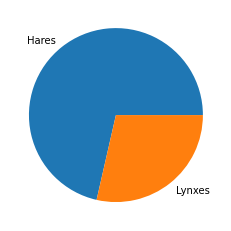

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


In [7]:
ar = np.array(['H', 'L'])[np.argmax(data[:, [1,2]], axis = 1)]

animals = ['Hares', 'Lynxes']
pc = np.array([len(np.argwhere(ar == 'H')), len(np.argwhere(ar == 'L'))])

plt.pie(pc, labels=animals)
plt.show()

print(ar)

Plot the change in the hare population and the number of lynxes. Find the correlation coefficient.

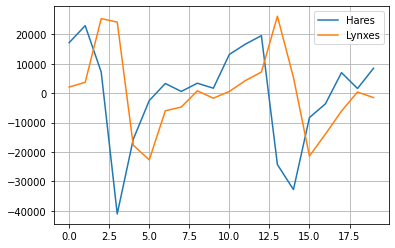

Correlation coefficient:    -0.1780136594118296


In [8]:
hach = data[1:,1]-data[:-1,1]
lych =data[1:,2]-data[:-1,2]

plt.plot(hach, label='Hares')
plt.plot(lych, label='Lynxes')


plt.legend()
plt.grid()
plt.show()

print("Correlation coefficient:   ", np.corrcoef(hach, lych)[0, 1])

Using a scatter plot, show the population of hares vs carrots and hares vs lynxes by year on two separate subplots (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

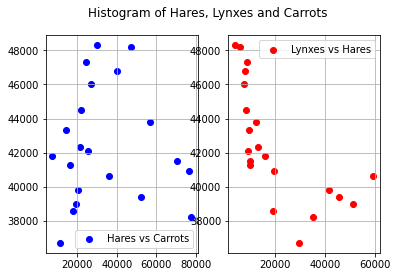

In [9]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Histogram of Hares, Lynxes and Carrots')

axs[0].scatter(data[:, 1], data[:, 3], label='Hares vs Carrots', color= "blue")
axs[1].scatter(data[:, 2], data[:, 3], label='Lynxes vs Hares', color="red")

axs[0].grid()
axs[1].grid()

axs[0].legend()
axs[1].legend()

plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

Let's try to apply interpolation by a polynomial. The graph has a periodic character, so an acceptable forecast using this method will be obtained only if the values of population growth are taken into account.

Forecast:   18044.99999809265 \Real Value:  16200.0


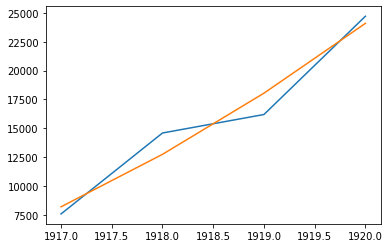

In [34]:
start = 17
polynom = np.polyfit(data[start:, 0], data[start:, 1], 2)

forecast = np.polyval(polynom, 2020)

plt.plot(data[start:, 0], data[start:, 1], label='Hares')
plt.plot(data[start:, 0], np.polyval(polynom, data[ start:, 0]), label='HaresForecast')

print("Forecast:  ", np.polyval(polynom, 1919.), "\Real Value: ", data[-2, 1])

Let's try to use all the data.

Forecast:   9464.0 \Real Value:  16200.0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


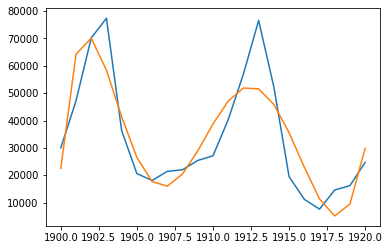

In [37]:
start = 0
polynom = np.polyfit(data[start:, 0], data[start:, 1], 20)

forecast = np.polyval(polynom, 2020)

plt.plot(data[start:, 0], data[start:, 1], label='Hares')
plt.plot(data[start:, 0], np.polyval(polynom, data[ start:, 0]), label='HaresForecast')

print("Forecast:  ", np.polyval(polynom, 1919.), "\Real Value: ", data[-2, 1])